<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/principal-component-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 18: Principal component methods

This homework assignment is designed to give you an intuition on principal component approaches to understanding high dimensional statistical relationships.

Like earlier homework, you will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

1. Loading data 1/1
2. Correlational structure 4/4
3. Principal Component analysis 3/3
4. Associating with Flanker task performance 4/4
5. Reflection 2/2

---
## 1. Loading data (1 point)

We are going to look for low dimensional relationships between brain volume measures and working memory capacity.

First, we will need to load the `pls`, `tidyverse`, and `ggplot2` libraries for this assignment.


In [ ]:
# WRITE YOUR CODE HERE
install.packages("pls")
library(pls)
library(tidyverse)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Use `read.csv` function to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file in the **hcp_data** folder.

(a) Using the tidyverse tools, make a new dataframe `d1` that only includes the Flanker Task performance (`Flanker_Unadj`) and *all* freesurfer **volume** measures for the right and left hemispheres together. Remove both "na's" and any columns that consist of only zeros.

Hint: Look up using the `ends_with` function to only select variables that end with "_Vol"

Use the `head` function to look at the first few rows of each data frame.

In [ ]:
# WRITE YOUR CODE HERE
system("gdown --id 1hywRmGdvhbDYTrQRyl1_bLJsq-T3GJq2")

df = read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

d1 = df %>%
     select(Flanker_Unadj, ends_with("_Vol")) %>%
     drop_na() %>%
     select(where(~ !all(. == 0)))
head(d1)

,Flanker_Unadj,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,⋯,FS_R_Vessel_Vol,FS_R_ChoroidPlexus_Vol,FS_5thVent_Vol,FS_WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,130.42,1864518,1406924,304488,305634,610122,70240,807245,1239692,269963,⋯,80,1613,0,1269,325,800,409,569,522,813
2,112.56,1512540,1109710,240030,243207,483238,56623,664124,957615,203472,⋯,70,1007,0,1155,195,1029,526,578,576,649
3,121.18,1684117,1280171,260695,265243,525938,63869,726206,1106881,247504,⋯,88,1303,0,1279,302,972,589,528,471,858
4,126.53,1816044,1321362,276506,278002,554508,74869,762308,1155067,254742,⋯,81,909,0,1154,296,1065,618,838,729,1072
5,101.85,1437868,1053766,203718,210539,414257,58813,579632,916973,213012,⋯,75,1215,3,377,235,1057,591,538,430,849
6,107.04,1512727,1126655,242489,248807,491296,62092,665024,984952,205342,⋯,93,1331,17,554,258,1033,494,487,489,992


---
## 2. Correlational structure (4 points)

(a) Take a look at the correlation between all of the freesurfer volume measures ("FS_") using the `cor` function. Create a new variable called `fs_cor` that is the correlation matrix for only the freesurfer volumes

In [ ]:
# WRITE YOUR CODE HERE
d_fs = d1 %>%
  select(starts_with("FS_"))

fs_cor = cor(d_fs)

fs_cor

,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,FS_R_WM_Vol,⋯,FS_R_Vessel_Vol,FS_R_ChoroidPlexus_Vol,FS_5thVent_Vol,FS_WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
FS_IntraCranial_Vol,1.00000000,0.89775779,0.84001739,0.8439151,0.84527801,0.78851398,0.8751297,0.88515809,0.83110860,0.82780629,⋯,0.15363321,0.428612089,0.087584249,0.222582581,0.33097622,0.34486799,0.18960892,0.197341425,0.284599652,0.40182119
FS_BrainSeg_Vol,0.89775779,1.00000000,0.94481588,0.9482717,0.95026178,0.86899391,0.9664839,0.99584206,0.95025059,0.94827234,⋯,0.20678367,0.412581030,0.049790923,0.323144337,0.35006717,0.37677373,0.27243466,0.270768619,0.353484192,0.43087227
FS_LCort_GM_Vol,0.84001739,0.94481588,1.00000000,0.9844592,0.99601958,0.78978633,0.9821287,0.94856174,0.82823562,0.82204438,⋯,0.17001517,0.351647503,0.027475287,0.327222174,0.27354855,0.25151569,0.19618089,0.208943426,0.257297934,0.31406264
FS_RCort_GM_Vol,0.84391512,0.94827175,0.98445925,1.0000000,0.99619391,0.79257235,0.9830322,0.95186738,0.83308464,0.83075164,⋯,0.17595431,0.344117704,0.034303100,0.339033622,0.28341844,0.24448681,0.19182668,0.211885362,0.259001604,0.30540697
FS_TotCort_GM_Vol,0.84527801,0.95026178,0.99601958,0.9961939,1.00000000,0.79428656,0.9864250,0.95394600,0.83393307,0.82967591,⋯,0.17369412,0.349199524,0.031048540,0.334495942,0.27962765,0.24893064,0.19473767,0.211253307,0.259167897,0.31089656
FS_SubCort_GM_Vol,0.78851398,0.86899391,0.78978633,0.7925724,0.79428656,1.00000000,0.8407289,0.85912648,0.82483108,0.82505024,⋯,0.23081438,0.381043922,0.028549272,0.277929493,0.32808259,0.36367157,0.31694057,0.270171847,0.332095449,0.40412120
FS_Total_GM_Vol,0.87512975,0.96648393,0.98212867,0.9830322,0.98642496,0.84072890,1.0000000,0.95676918,0.84630850,0.84265274,⋯,0.19061124,0.365072324,0.036498799,0.327752825,0.30026585,0.26509338,0.21393596,0.227828080,0.273788710,0.32692300
FS_SupraTentorial_Vol,0.88515809,0.99584206,0.94856174,0.9518674,0.95394600,0.85912648,0.9567692,1.00000000,0.95657235,0.95448952,⋯,0.20303200,0.410095816,0.047016231,0.326916622,0.34304042,0.38403125,0.27388840,0.268821695,0.356887229,0.43655852
FS_L_WM_Vol,0.83110860,0.95025059,0.82823562,0.8330846,0.83393307,0.82483108,0.8463085,0.95657235,1.00000000,0.99720862,⋯,0.20733288,0.360053967,0.041169736,0.312125828,0.35983007,0.46628464,0.37067576,0.352852343,0.445780348,0.50126064
FS_R_WM_Vol,0.82780629,0.94827234,0.82204438,0.8307516,0.82967591,0.82505024,0.8426527,0.95448952,0.99720862,1.00000000,⋯,0.20560868,0.360960457,0.041746175,0.316231493,0.36438062,0.46048694,0.36768598,0.351758721,0.441418100,0.49765782


(b) Load (and install locally if needed) the `reshape2` library in order to use the `melt` function on the new `fs_cor` object. Use `head` to show the new, melted `fs_cor` object.

In [ ]:
# WRITE YOUR CODE HERE
#install.packages("reshape2")
library(reshape2)
fs_cor = melt(fs_cor)
head(fs_cor)

Using Var1, Var2 as id variables



,Var1,Var2,variable,value
,<fct>,<fct>,<fct>,<dbl>
1,FS_IntraCranial_Vol,FS_IntraCranial_Vol,value,1.0000000
2,FS_BrainSeg_Vol,FS_IntraCranial_Vol,value,0.8977578
3,FS_LCort_GM_Vol,FS_IntraCranial_Vol,value,0.8400174
4,FS_RCort_GM_Vol,FS_IntraCranial_Vol,value,0.8439151
5,FS_TotCort_GM_Vol,FS_IntraCranial_Vol,value,0.8452780
6,FS_SubCort_GM_Vol,FS_IntraCranial_Vol,value,0.7885140


Plot the correlation as a heatmap using `ggplot2`.

Hint: use the `scale_fill_gradient2` function to scale the colors between red and blue, capping the values at -1 and +1.

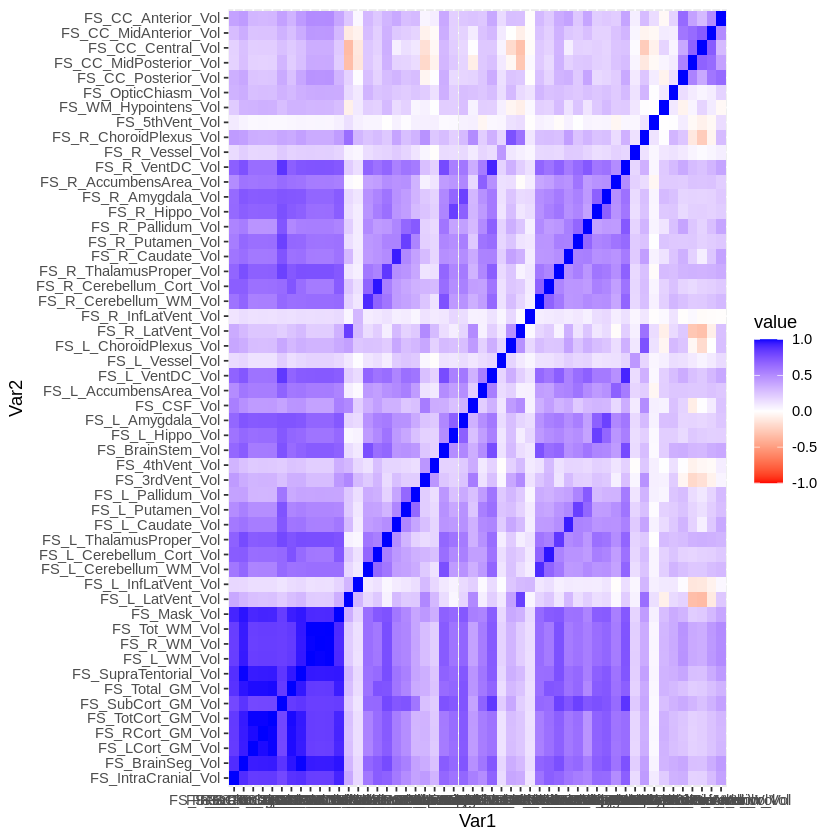

In [ ]:
# WRITE YOUR CODE HERE
fs_cor %>%
  ggplot(aes(x = Var1, y = Var2, fill = value)) + geom_tile() + scale_fill_gradient2(low = "red",
    mid = "white",
    high = "blue",
    midpoint = 0,
    limits = c(-1, 1))

What patterns do you see in the correlations?

> *There are very few red leaning correlations so very minimal negative correlations, there is a vert strong positive correlation section in the bottom left corner of the graph*



---
## 3. Principal component analysis (3 points)

Let's see how many principal components explain at *at least* 95% of the data.

(a) Create a new object called `fs_d.pca` using the `princomp` function (do not forget to scale the data).


In [ ]:
# WRITE YOUR CODE HERE
fs_d.pca = princomp(d_fs, cor = TRUE)
summary(fs_d.pca)

Importance of components:
                          Comp.1     Comp.2     Comp.3    Comp.4     Comp.5
Standard deviation     4.8304225 2.07734628 1.65701904 1.4542775 1.30623792
Proportion of Variance 0.4487112 0.08298784 0.05280216 0.0406716 0.03281264
Cumulative Proportion  0.4487112 0.53169903 0.58450118 0.6251728 0.65798543
                           Comp.6    Comp.7    Comp.8     Comp.9    Comp.10
Standard deviation     1.16284392 1.1399496 1.0653535 1.04639581 1.01824771
Proportion of Variance 0.02600396 0.0249901 0.0218265 0.02105662 0.01993901
Cumulative Proportion  0.68398939 0.7089795 0.7308060 0.75186261 0.77180161
                          Comp.11   Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     0.96724824 0.9260219 0.90433487 0.86368396 0.80338987
Proportion of Variance 0.01799171 0.0164907 0.01572734 0.01434519 0.01241222
Cumulative Proportion  0.78979333 0.8062840 0.82201137 0.83635656 0.84876878
                          Comp.16    Comp.17    Comp.18   

(b) Calculate the cumulative variance explained (not unique variance explained as in the tutorial) across the principal components and plot the results using `ggplot`.

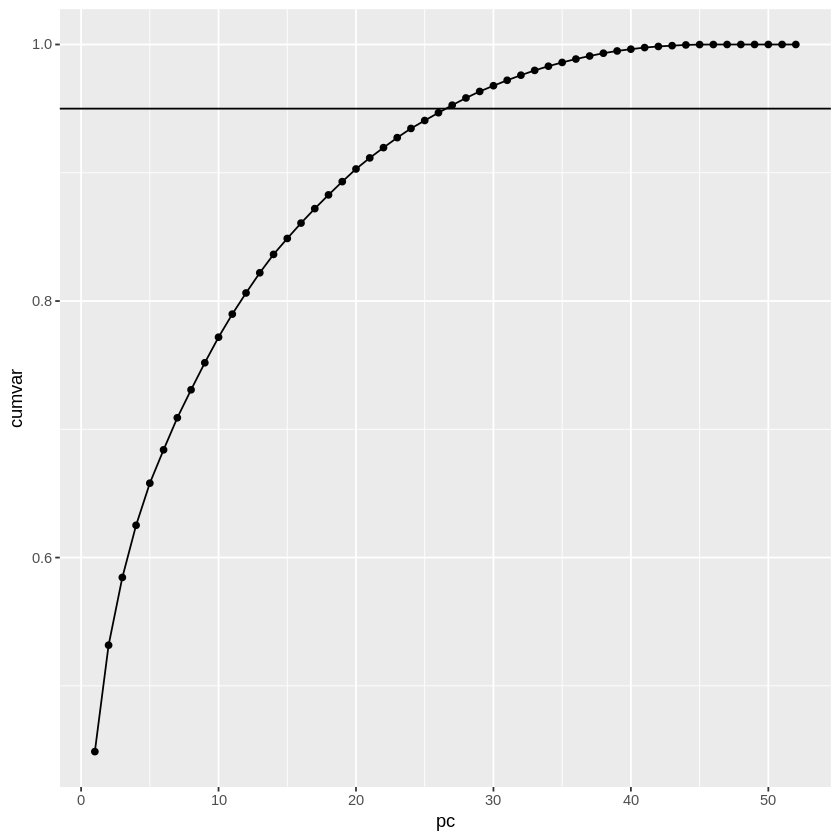

In [ ]:
# WRITE YOUR CODE HERE
df3 = data.frame(pc = 1:length(fs_d.pca$sdev)) %>%
  mutate(cumvar = cumsum(fs_d.pca$sdev^2 / sum(fs_d.pca$sdev^2)))

df3 %>%
  ggplot(aes(x = pc, y = cumvar)) + geom_line() + geom_point() + geom_hline(yintercept = 0.95)

(c) Determine exactly how many principal components explain at least 95% of the variance.

Hint: Look up the `which` function.

In [ ]:
# WRITE YOUR CODE HERE
which(df3$cumvar >= 0.95)[1]

Comp.27 
     27

What does this tell you about the underlying dimensionality of the brain volume measures?

> *That we need 27 principal components to explain 95% of the variance in the data. High dimensionality in this dataset, you need a lot of measures to learn something meaningful here*
> *


---
## 4. Associating with Flanker task peformance (4 points)

Now apply PCR to the `d1` object you created at the beginning (which includes the Flanker task scores) to find how freesurfer volumes predict Flanker task performance. Set the random seed to "2". Use cross-validation as the validation type and don't forget to scale your data. Show the `summary` of the model fit.

Hint: If you receive an error applying the "scale=TRUE" flag, then you likely still have columns of all zeros somewhere in your data table.

In [ ]:
# WRITE YOUR CODE HERE
set.seed(2)
pcr.fit = pcr(Flanker_Unadj ~ ., data = d1, scale=TRUE, validation = "CV")

summary(pcr.fit)


Data: 	X dimension: 1113 52 
	Y dimension: 1113 1
Fit method: svdpc
Number of components considered: 52

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           10.08    9.925    9.924    9.933    9.922    9.924    9.912
adjCV        10.08    9.924    9.923    9.932    9.920    9.922    9.910
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       9.889    9.891    9.893     9.896     9.909     9.918     9.934
adjCV    9.886    9.887    9.890     9.892     9.904     9.913     9.927
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        9.941     9.945     9.934     9.899     9.896     9.907     9.914
adjCV     9.934     9.939     9.928     9.889     9.886     9.897     9.903
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV        9.922     9.930     9.939     9.955     9.968     9.971     9.979
adjCV     9.911  

(b) Use the `validationplot` function to evaluate the bias-variance tradeoff using the cross-validated mean squared-error for each component.

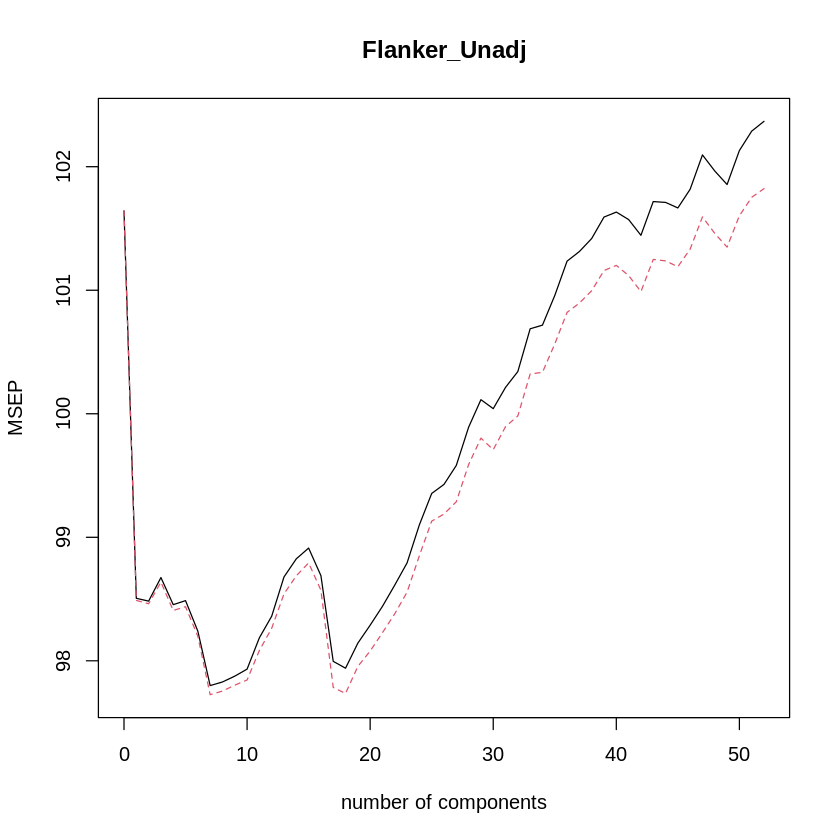

In [ ]:
# WRITE YOUR CODE HERE
validationplot(pcr.fit,val.type="MSEP")

(c) Extract the MSEP values of the cross validated fit ("CV" not "adj_CV") from the model object using the `MSEP` funtion. Create a new array of these values. Use the `drop` function to remove the singleton dimension (the original array is 2x1x53 and we want a 2x53 object). Find the minimum value of the first row (the "CV").

In [ ]:
# WRITE YOUR CODE HERE
msep.val = MSEP(pcr.fit)$val %>%
  drop() %>%
  as.data.frame() %>%
  rownames_to_column(var = "Type") %>%
  pivot_longer(
    cols = -Type,
    names_to = "comp",
    values_to = "MSEP"
  )

msep.val %>%
  filter(Type == "CV") %>%
  summarize(min_msep = min(MSEP))

min_msep
<dbl>
97.79933


What what does this plot tell you about how many components best explain variance in Flanker task performance?

> *plot tells that about 8 component best explain the variance as you get higher and higher adding components doesn't help*


---
## 5. Reflection (2 points)

Compare the number of components that explain variance in X alone (the brain volumes) to the number of components that explain performance in the Flanker task. What does the difference in these two numbers tell you about how variation in brain volumes relates to task performance?

> *27 components needed to explain variance in the brain volumes while only 8 for performance in the Flanker task. This shows that most of the variation in brain volumes doesn't relate to task performance*

>

**DUE:** 5pm EST, April 15, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*